# 2019 PGA Tour Golf Data

In [134]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
#read the data
df = pd.read_csv('2019_data.csv',encoding = 'latin-1')

In [136]:
#view the head of the data
df.head()

,Player Name,Date,Statistic,Variable,Value
0,Cameron Champ,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),78
1,Rory McIlroy,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),68
2,Luke List,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),66
3,Wyndham Clark,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),87
4,Dustin Johnson,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),69


In [137]:
#check the null values in the data
df.isnull().sum()

Player Name       478
Date                0
Statistic           0
Variable            0
Value          169727
dtype: int64

In [138]:
#convert to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])

In [139]:
df['Year'] = df['Date'].apply(lambda time: time.year)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)

In [140]:
df.head()

,Player Name,Date,Statistic,Variable,Value,Year,Month,Day of Week
0,Cameron Champ,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),78,2019,8,6
1,Rory McIlroy,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),68,2019,8,6
2,Luke List,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),66,2019,8,6
3,Wyndham Clark,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),87,2019,8,6
4,Dustin Johnson,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),69,2019,8,6


In [141]:
#unique statistics
df['Statistic'].unique()

array(['Driving Distance', 'Driving Accuracy Percentage',
       'Greens in Regulation Percentage', 'Putting Average',
       'Par Breakers', 'Total Eagles', 'Total Birdies',
       'Scoring Average (Actual)', 'Official Money',
       'Sand Save Percentage', 'Par 3 Birdie or Better Leaders',
       'Par 4 Birdie or Better Leaders', 'Par 5 Birdie or Better Leaders',
       'Birdie or Better Conversion Percentage', 'Putts Per Round',
       'Scoring Average', 'All-Around Ranking', 'Total Driving',
       'Scrambling', 'Ryder Cup Points', 'PGA Championship Points',
       'Putts made Distance', 'Top 10 Finishes', 'Non-member Earnings',
       'Par 3 Scoring Average', 'Par 4 Scoring Average',
       'Par 5 Scoring Average', "3-Putt Avoidance - 15-20'",
       "3-Putt Avoidance - 20-25'", "3-Putt Avoidance > 25'",
       'Current Par or Better Streak', "Rounds in the 60's",
       'Money per Event Leaders', 'Eagles (Holes per)', 'Birdie Average',
       'Ball Striking', 'Longest Drives', 'B

Data Visualization

Visualization for Total Driving Distance

In [142]:
df['Variable'].unique()

array(['Driving Distance - (ROUNDS)', 'Driving Distance - (AVG.)',
       'Driving Distance - (TOTAL DISTANCE)', ...,
       'SG: Around-the-Green - (MEASURED ROUNDS)',
       'SG: Around-the-Green - (ROUNDS)',
       'SG: Around-the-Green - (TOTAL SG:ARG)'], dtype=object)

In [143]:
df_variable1 = df[df['Variable'] == 'Driving Distance - (TOTAL DISTANCE)'].iloc[:,[0,4]]

df_variable1['new_values'] = df_variable1['Value'].apply(lambda x : ''.join(x.split(',')))

df_variable1['new_values'] = df_variable1['new_values'].astype(int)

In [144]:
df_variable1 = df_variable1.drop('Value', axis=1)

In [145]:
df_updated_variable1 = df_variable1.groupby('Player Name')['new_values'].max().sort_values(ascending = False)[:10].sort_values()

Text(0.5, 1.0, 'Top 10 Players by Driving Distance')

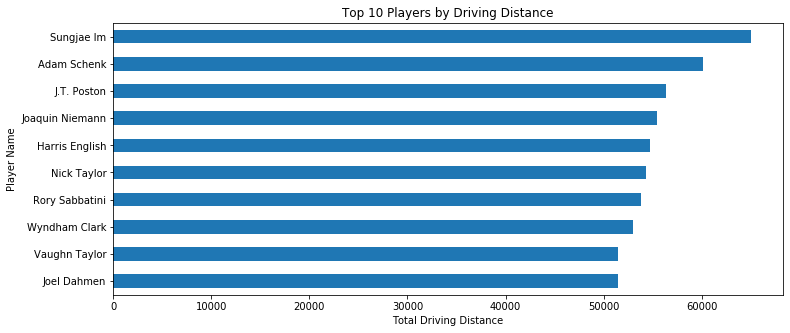

In [146]:
plt.figure(figsize=(12,5))
df_updated_variable1.plot.barh()
plt.xlabel('Total Driving Distance')
plt.title('Top 10 Players by Driving Distance')

Visualization for Average Driving Distance

In [167]:
df_variable2 = df[df['Variable'] == 'Driving Distance - (AVG.)'].iloc[:,[0,4]]

In [174]:
df_variable2['Value'] = df_variable2['Value'].astype(float)

In [175]:
df_variable2.head()

,Player Name,Value
192,Cameron Champ,317.9
193,Rory McIlroy,314.0
194,Luke List,313.3
195,Wyndham Clark,311.8
196,Dustin Johnson,311.7


In [176]:
df_updated_variable2 = df_variable2.groupby('Player Name')['Value'].max().sort_values(ascending = False)[:10].sort_values()

Text(0.5, 1.0, 'Top 10 Players by Driving Distance')

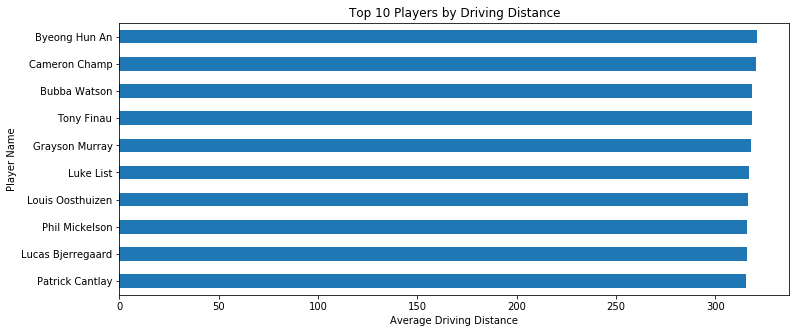

In [177]:
plt.figure(figsize=(12,5))
df_updated_variable2.plot.barh()
plt.xlabel('Average Driving Distance')
plt.title('Top 10 Players by Driving Distance')

Visualization for Rounds Driving Distance

In [178]:
df_variable3 = df[df['Variable'] == 'Driving Distance - (ROUNDS)'].iloc[:,[0,4]]

In [180]:
df_variable3.head()

,Player Name,Value
0,Cameron Champ,78
1,Rory McIlroy,68
2,Luke List,66
3,Wyndham Clark,87
4,Dustin Johnson,69


In [181]:
df_variable3['Value'] = df_variable3['Value'].astype(int)

In [182]:
df_updated_variable3 = df_variable3.groupby('Player Name')['Value'].max().sort_values(ascending = False)[:10].sort_values()

Text(0.5, 1.0, 'Top 10 Players by Driving Distance')

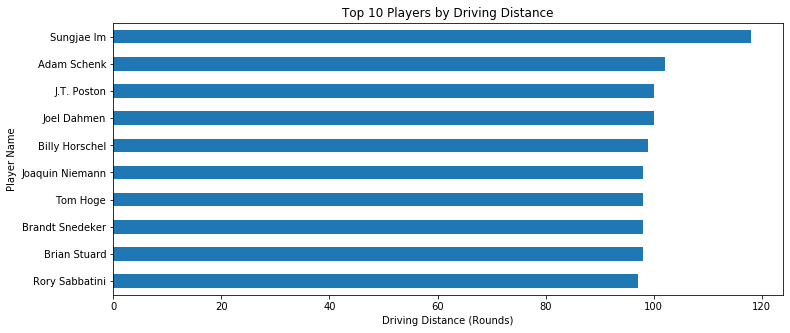

In [183]:
plt.figure(figsize=(12,5))
df_updated_variable3.plot.barh()
plt.xlabel('Driving Distance (Rounds)')
plt.title('Top 10 Players by Driving Distance')

Data Visualization of the top ten driving distance from January to August

In [184]:
df.head()

,Player Name,Date,Statistic,Variable,Value,Year,Month,Day of Week
0,Cameron Champ,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),78,2019,8,6
1,Rory McIlroy,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),68,2019,8,6
2,Luke List,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),66,2019,8,6
3,Wyndham Clark,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),87,2019,8,6
4,Dustin Johnson,2019-08-18,Driving Distance,Driving Distance - (ROUNDS),69,2019,8,6


In [201]:
df_new = df[df['Variable'] == 'Driving Distance - (TOTAL DISTANCE)'].iloc[:,[0,4,6]]


In [202]:
df_new.head()


,Player Name,Value,Month
384,Cameron Champ,"48,322",8
385,Rory McIlroy,"37,676",8
386,Luke List,"39,481",8
387,Wyndham Clark,"53,004",8
388,Dustin Johnson,"38,656",8


In [204]:

df_new['new_values'] = df_new['Value'].apply(lambda x : ''.join(x.split(',')))

In [206]:
df_new = df_new.drop('Value',axis=1)

In [207]:
df_new.head()

,Player Name,Month,new_values
384,Cameron Champ,8,48322
385,Rory McIlroy,8,37676
386,Luke List,8,39481
387,Wyndham Clark,8,53004
388,Dustin Johnson,8,38656


In [216]:
df_new['new_values'] = df_new['new_values'].astype(int)

array([8, 7, 6, 1, 2, 3, 4, 5])

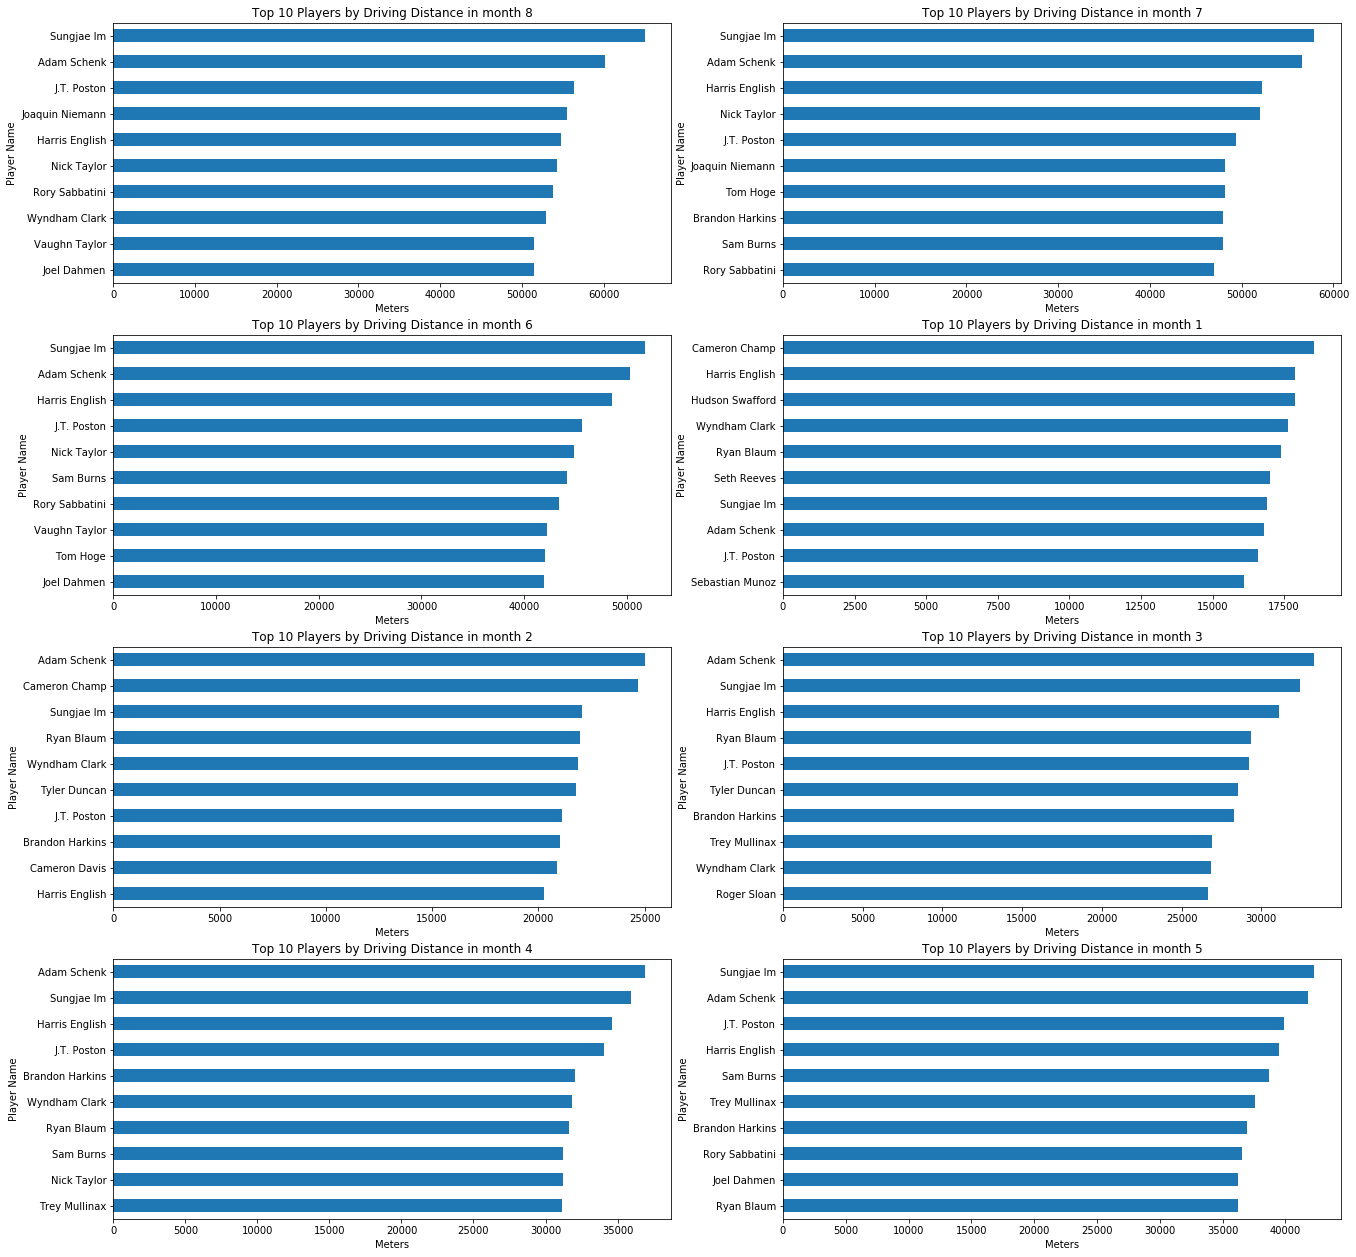

In [223]:
plt.figure(figsize=(22,22))
for i in range(len(df_new['Month'].unique())):
    df_new_month = df_new[df_new['Month'] == df_new['Month'].unique()[i]]
    plt.subplot(4,2,i+1)
    df_new_month.groupby('Player Name')['new_values'].max().sort_values(ascending = False)[:10].sort_values().plot.barh()
    plt.xlabel('Meters')
    plt.title('Top 10 Players by Driving Distance in month {}'. format(df_new['Month'].unique()[i]))
    
    

Visualization for Total Eagles

Text(0.5, 1.0, 'Top 10 players by Total Eagles (Total)')

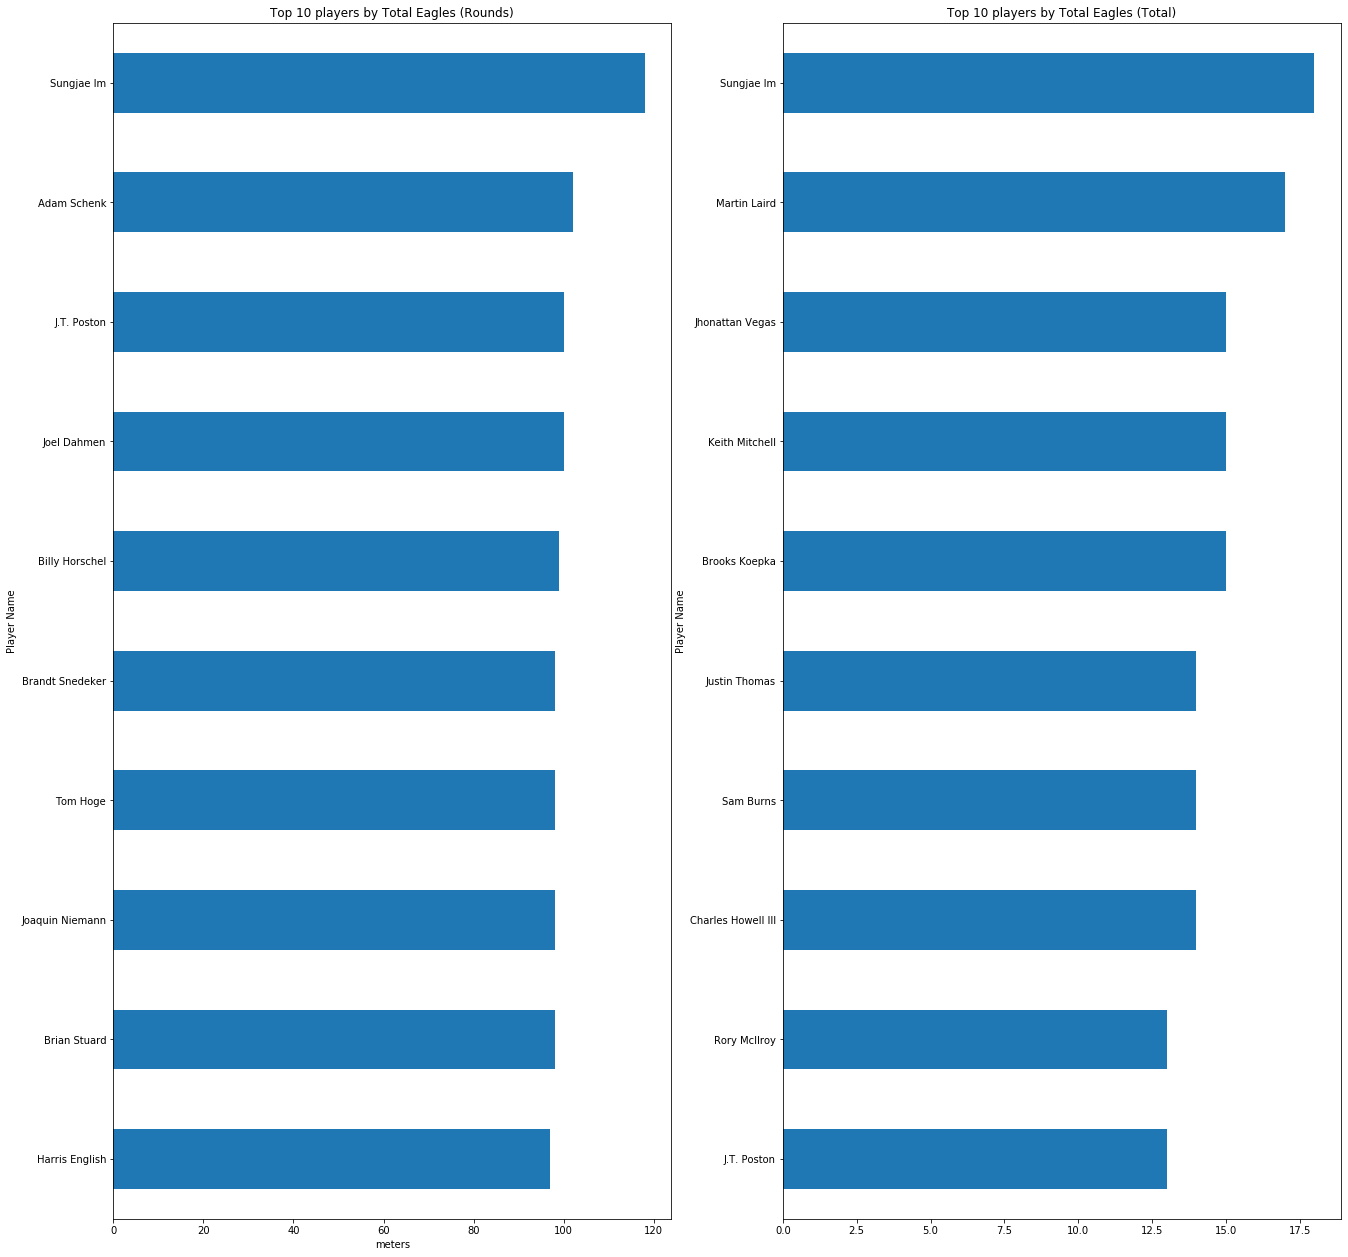

In [234]:
plt.figure(figsize=(22,22))
TER = df[df['Variable'] == 'Total Eagles - (ROUNDS)'].iloc[:,[0,4]]
TER['Value'] = TER['Value'].astype(int)
plt.subplot(1,2,1)
TER.groupby('Player Name')['Value'].max().sort_values(ascending = False)[:10].sort_values().plot.barh()
plt.xlabel('meters')
plt.title('Top 10 players by Total Eagles (Rounds)')


TET = df[df['Variable'] == 'Total Eagles - (TOTAL)'].iloc[:,[0,4]]
TET['Value'] = TET['Value'].astype(float)
plt.subplot(1,2,2)
TET.groupby('Player Name')['Value'].max().sort_values(ascending = False)[:10].sort_values().plot.barh()
plt.title('Top 10 players by Total Eagles (Total)')